# Assignment 2.2: Convolutional Neural Network
Student Name 1: Al Bahri Yassir 

Student Name 2: Alderisi Serena 

Student Name 3: Mateos Vicente Elisa 

## German Traffic Sign Benchmark

Download full data set from http://benchmark.ini.rub.de/?section=gtsdb&subsection=dataset

In [3]:
from google.colab import drive
drive.mount('/GoogleDrive', force_remount=True)

!unzip  "/GoogleDrive/My Drive/Colab Notebooks/FullIJCNN2013.zip"

Mounted at /GoogleDrive
Archive:  /GoogleDrive/My Drive/Colab Notebooks/FullIJCNN2013.zip
   creating: FullIJCNN2013/
   creating: FullIJCNN2013/00/
  inflating: FullIJCNN2013/00000.ppm  
  inflating: FullIJCNN2013/00001.ppm  
  inflating: FullIJCNN2013/00002.ppm  
  inflating: FullIJCNN2013/00003.ppm  
  inflating: FullIJCNN2013/00004.ppm  
  inflating: FullIJCNN2013/00005.ppm  
  inflating: FullIJCNN2013/00006.ppm  
  inflating: FullIJCNN2013/00007.ppm  
  inflating: FullIJCNN2013/00008.ppm  
  inflating: FullIJCNN2013/00009.ppm  
  inflating: FullIJCNN2013/00010.ppm  
  inflating: FullIJCNN2013/00011.ppm  
  inflating: FullIJCNN2013/00012.ppm  
  inflating: FullIJCNN2013/00013.ppm  
  inflating: FullIJCNN2013/00014.ppm  
  inflating: FullIJCNN2013/00015.ppm  
  inflating: FullIJCNN2013/00016.ppm  
  inflating: FullIJCNN2013/00017.ppm  
  inflating: FullIJCNN2013/00018.ppm  
  inflating: FullIJCNN2013/00019.ppm  
  inflating: FullIJCNN2013/00020.ppm  
  inflating: FullIJCNN2013/00021

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (64, 64)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
import numpy as np
import cv2

IMG_HEIGHT = 600
SIGN_SIZE = (32, 32)

# Function for reading the images
def readImages(rootpath, images_range, signs_range):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.
    Arguments: path to the traffic sign data, for example 'FullIJCNN2013'
    Returns:   list of images, list of corresponding labels'''
    images = {} # original image
    scales = {} # original scale
    for num in images_range:
        filename = rootpath + '/' + "{:05d}".format(num) + '.ppm'
        img = cv2.imread(filename, cv2.IMREAD_COLOR)
        scale = IMG_HEIGHT / float(img.shape[0])
        img_resized = cv2.resize(img, (int(img.shape[1]*scale),int(img.shape[0]*scale)))
        images.setdefault(filename,[]).append(img_resized)
        scales.setdefault(filename,[]).append(scale)

    files = [] # filenames
    signs = [] # traffic sign image
    bboxes = [] # corresponding box detection
    labels = [] # traffic sign type
    data = np.genfromtxt(rootpath + '/' + 'gt.txt', delimiter=';', dtype=str, usecols=range(0, 6))
    for elem in signs_range:
        filename = rootpath + '/' + data[elem][0]
        img = images.get(filename)[0]
        scale = scales.get(filename)[0]
        bbox = np.array([int(data[elem][1]), int(data[elem][2]), int(data[elem][3]), int(data[elem][4])]) * scale
        sign = img[int(bbox[1]):int(bbox[3]), int(bbox[0]):int(bbox[2])]
        sign_resized = cv2.resize(sign, SIGN_SIZE)
        files.append(filename)
        signs.append(sign_resized)
        bboxes.append(bbox)
        labels.append(data[elem][5])
    return images, files, signs, bboxes, labels

In [0]:
# The German Traffic Sign Recognition Benchmark
train_images, train_files, train_signs, train_bboxes, train_labels = readImages('FullIJCNN2013', range(0,600), range(0,852))
test_images, test_files, test_signs, test_bboxes, test_labels = readImages('FullIJCNN2013', range(600,900), range(852,1213))

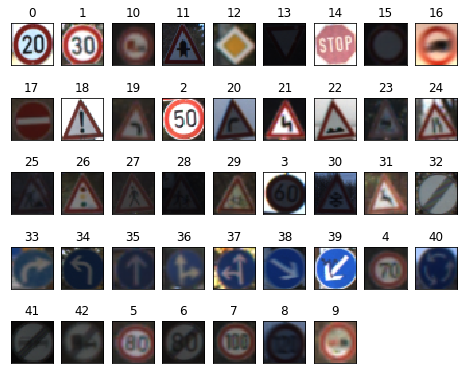

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(train_labels)
num_classes = len(class_names)
fig = plt.figure(figsize=(8,8))
for i in range(num_classes):
    ax = fig.add_subplot(6, 9, 1 + i, xticks=[], yticks=[])
    ax.set_title(class_names[i])
    indices = np.where(np.isin(train_labels, class_names[i]))[0]
    plt.imshow(cv2.cvtColor(train_signs[int(np.random.choice(indices, 1))], cv2.COLOR_BGR2RGB))
plt.show()

In [9]:
from sklearn.utils import shuffle
train_files, train_signs, train_bboxes, train_labels = shuffle(train_files, train_signs, train_bboxes, train_labels)
# plt.imshow(cv2.cvtColor(train_images.get(train_files[0])[0], cv2.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(cv2.cvtColor(train_signs[0], cv2.COLOR_BGR2RGB))
# plt.show()
# print(train_bboxes[0])
# print(train_labels[0])

# Data pre-processing
tr_signs = np.array(train_signs)[0:600]
tr_labels = np.array(train_labels)[0:600]
va_signs = np.array(train_signs)[600:852]
va_labels = np.array(train_labels)[600:852]
te_signs = np.array(test_signs)
te_labels = np.array(test_labels)

tr_signs = tr_signs.astype('float32')
va_signs = va_signs.astype('float32')
te_signs = te_signs.astype('float32')
tr_signs /= 255.0
va_signs /= 255.0
te_signs /= 255.0

from keras.utils import np_utils
tr_labels = np_utils.to_categorical(tr_labels, num_classes)
va_labels = np_utils.to_categorical(va_labels, num_classes)
te_labels = np_utils.to_categorical(te_labels, num_classes)

Using TensorFlow backend.


In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2

input_shape = (SIGN_SIZE[0], SIGN_SIZE[1], 3)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape))
cnn.add(Activation('elu'))
cnn.add(Conv2D(128, kernel_size=(3, 3), activity_regularizer=l2(0.001)))
cnn.add(Activation('elu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu', activity_regularizer=l2(0.001)))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, kernel_size=(3, 3)))
cnn.add(Activation('elu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Flatten())

cnn.add(Dense(128, activation='elu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cnn.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       36992     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       14

In [11]:
from time import time

data = cnn.fit(tr_signs, tr_labels,
        batch_size=50,
        epochs=100,
        verbose=1,
        validation_data=(va_signs, va_labels))

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=1)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 600 samples, validate on 252 samples
Epoch 1/100
600/600 [==============================] - 8s 13ms/step - loss: 18.3152 - acc: 0.0983 - val_loss: 7.7001 - val_acc: 0.1429
Epoch 2/100
600/600 [==============================] - 6s 10ms/step - loss: 6.3492 - acc: 0.2433 - val_loss: 4.7954 - val_acc: 0.2817
Epoch 3/100
600/600 [==============================] - 6s 10ms/step - loss: 4.4949 - acc: 0.3333 - val_loss: 3.5373 - val_acc: 0.4246
Epoch 4/100
600/600 [==============================] - 6s 10ms/step - loss: 3.6010 - acc: 0.4133 - val_loss: 2.9362 - val_acc: 0.4960
Epoch 5/100
600/600 [==============================] - 7s 11ms/step - loss: 3.0850 - acc: 0.4917 - val_loss: 2.5805 - val_acc: 0.5675
Epoch 6/100
600/600 [==============================] - 7s 11ms/step - loss: 2.8095 - acc: 0.5050 - val_loss: 2.4482 - val_acc: 0.5754
Epoch 7/100
600/600 [==============================] 

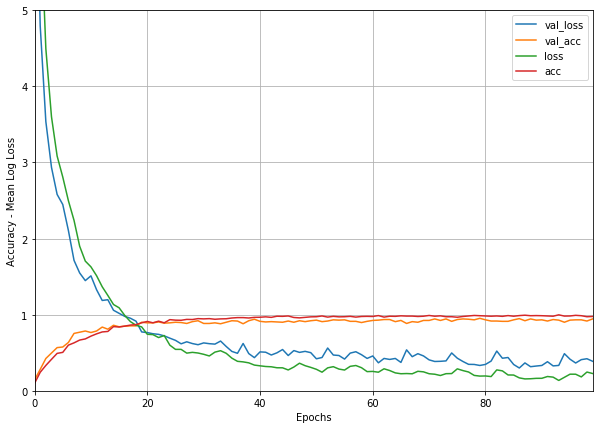

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame(data.history)
results.plot(figsize = (10, 7))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 5) # set the vertical range to [0,1]
plt.show()

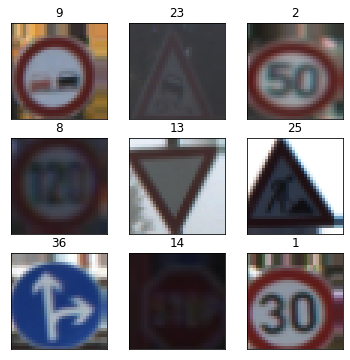

In [13]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(tr_signs, augment=True)

for x_batch, y_batch in datagen.flow(tr_signs, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(cv2.cvtColor(x_batch[i], cv2.COLOR_BGR2RGB))
    # show the plot
    plt.show()
    break

In [14]:
batch_size = 50
train_steps = int(len(tr_signs) / batch_size)
valid_steps = int(len(va_signs) / batch_size)
data = cnn.fit_generator(datagen.flow(tr_signs, tr_labels, batch_size=batch_size), 
                         epochs=100, 
                         steps_per_epoch=train_steps, 
                         verbose=2, 
                         validation_data=(va_signs, va_labels), 
                         validation_steps=valid_steps)

start = time()
loss, acc = cnn.evaluate(te_signs, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Epoch 1/100
 - 6s - loss: 1.9164 - acc: 0.6550 - val_loss: 1.4170 - val_acc: 0.8770
Epoch 2/100
 - 6s - loss: 2.0255 - acc: 0.6783 - val_loss: 1.4317 - val_acc: 0.8730
Epoch 3/100
 - 6s - loss: 1.6798 - acc: 0.7300 - val_loss: 1.0058 - val_acc: 0.9167
Epoch 4/100
 - 6s - loss: 1.4276 - acc: 0.7400 - val_loss: 0.8225 - val_acc: 0.9048
Epoch 5/100
 - 6s - loss: 1.3248 - acc: 0.7667 - val_loss: 0.7583 - val_acc: 0.9246
Epoch 6/100
 - 6s - loss: 1.0704 - acc: 0.8083 - val_loss: 0.6260 - val_acc: 0.9286
Epoch 7/100
 - 6s - loss: 1.1027 - acc: 0.7983 - val_loss: 0.5897 - val_acc: 0.9484
Epoch 8/100
 - 6s - loss: 0.9521 - acc: 0.8150 - val_loss: 0.5497 - val_acc: 0.9405
Epoch 9/100
 - 6s - loss: 0.8223 - acc: 0.8350 - val_loss: 0.4949 - val_acc: 0.9484
Epoch 10/100
 - 6s - loss: 0.8228 - acc: 0.8400 - val_loss: 0.5240 - val_acc: 0.9444
Epoch 11/100
 - 6s - loss: 0.7912 - acc: 0.8383 - val_loss: 0.5824 - val_acc: 0.9325
Epoch 12/100
 - 6s - loss: 0.8015 - acc: 0.8450 - val_loss: 0.5027 - val_a

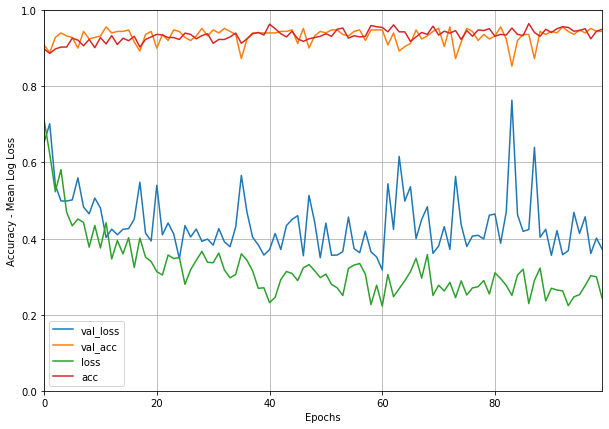

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

results = pd.DataFrame(data.history)
results.plot(figsize = (10, 7))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

# CIFAR 100 Dataset

In [0]:
from keras.datasets import cifar100
(_x_train, _y_train), (_x_test, _y_test) = cifar100.load_data(label_mode='fine')

169009152/169001437 [==============================] - 2s 0us/step


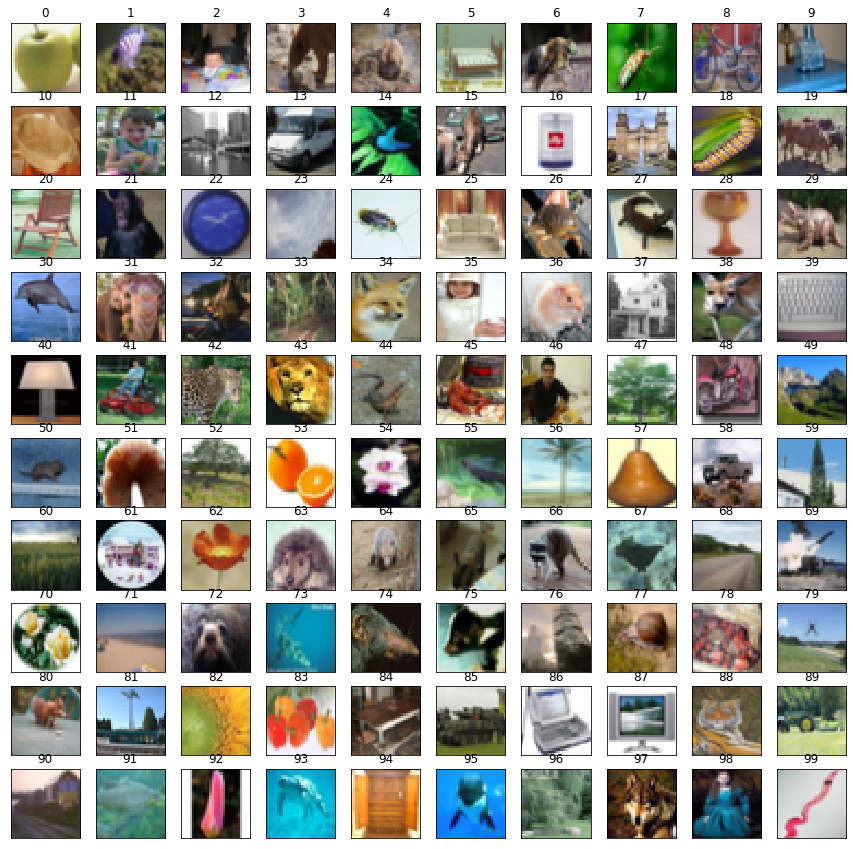

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Show examples from each class
class_names = np.unique(_y_train)
num_classes = len(class_names)

fig, axes = plt.subplots(10, 10,figsize=(15,15))
for i in range(num_classes):
    ax = axes.flatten()[i]
    indices = np.where(np.isin(_y_train, class_names[i]))[0]
    ax.imshow(_x_train[int(np.random.choice(indices, 1))])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.set_title(i)
plt.show()

In [0]:
# Data pre-processing
x_val = _x_train[40000:]
y_val = _y_train[40000:]
x_train = _x_train[:40000]
y_train = _y_train[:40000]
x_test = _x_test
y_test = _y_test

# Normalize the images to be values in range [0, 1]
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

from keras.utils import np_utils
# Converts a class vector (integers) to binary class matrix
tr_labels = np_utils.to_categorical(y_train, num_classes)
va_labels = np_utils.to_categorical(y_val, num_classes)
te_labels = np_utils.to_categorical(y_test, num_classes)

CIFAR_SIZE = (32, 32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import optimizers
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
import keras
from keras.layers import MaxPooling2D
from keras.layers.normalization import BatchNormalization

input_shape = (CIFAR_SIZE[0], CIFAR_SIZE[1], 3)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=input_shape))
cnn.add(Activation('relu'))
cnn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128, kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(BatchNormalization())
cnn.add(Dropout(0.5))
cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [0]:
data = cnn.fit(x_train, tr_labels,
        batch_size=16,
        epochs=25,
        verbose=1,
        validation_data=(x_val, va_labels))


start = time()
loss, acc = cnn.evaluate(x_test, te_labels, verbose=0)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

In [0]:
import pandas as pd

results = pd.DataFrame(data.history)
results.plot(figsize = (8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0,1]
plt.show()

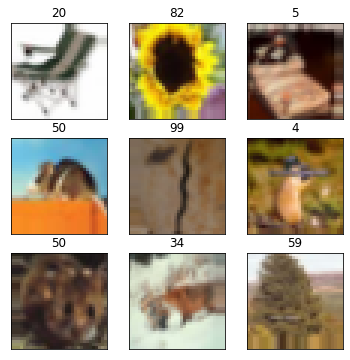

In [0]:
import cv2

from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, fill_mode='nearest')
datagen.fit(x_train, augment=True)

for x_batch, y_batch in datagen.flow(x_train, tr_labels, batch_size=9):
    # create a grid of 3x3 images
    fig = plt.figure(figsize=(6,6))
    for i in range(0, 9):
        ax = fig.add_subplot(3, 3, 1 + i, xticks=[], yticks=[])
        ax.set_title(np.argmax(y_batch[i]))
        plt.imshow(x_batch[i])
    # show the plot
    plt.show()
    break

In [0]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size=(3, 3), padding='same', input_shape=input_shape))
cnn.add(Activation('relu'))
cnn.add(Conv2D(16, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Conv2D(32, strides=(2, 2), kernel_size=(3, 3), padding='same'))
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Flatten())
cnn.add(Activation('relu'))
cnn.add(Dropout(0.2))
cnn.add(Dense(num_classes))
cnn.add(Activation('softmax'))

opt = keras.optimizers.Adam(learning_rate=0.0001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
cnn.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_86 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_87 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
activation_88 (Activation)   (None, 8, 8, 32)        

In [0]:

train_steps = int(len(x_train) / 16)
valid_steps = int(len(x_val) / 16)
data = cnn.fit_generator(datagen.flow(x_train, tr_labels, batch_size=16), 
                         epochs=20, 
                         steps_per_epoch=train_steps, 
                         verbose=2, 
                         validation_data=(x_val, va_labels), 
                         validation_steps=valid_steps)

start = time()
loss, acc = cnn.evaluate(x_test, te_labels, verbose=2)
end = time()
print('CNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Epoch 1/20
 - 417s - loss: 3.5835 - acc: 0.1759 - val_loss: 3.1754 - val_acc: 0.2560
Epoch 2/20


KeyboardInterrupt: ignored